<a href="https://colab.research.google.com/github/vedvkandge2000/Google-Colab/blob/master/Regression_deep_learning_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.isnull().sum()  # So we have done this this to check any null values present in data. sum() will just sumup the true number of points.
                   # From this we can say that there are no null values present in data.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


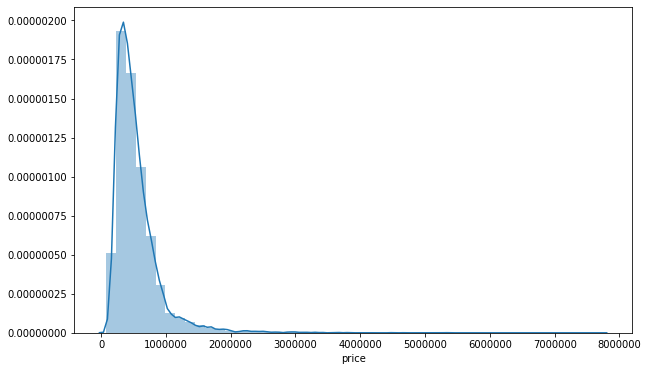

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
# From this we can say that price of house mostly lies between 1 to 3 million dollers.
# There are some outliers present mean some houses that are very expensive but they are very less in number.

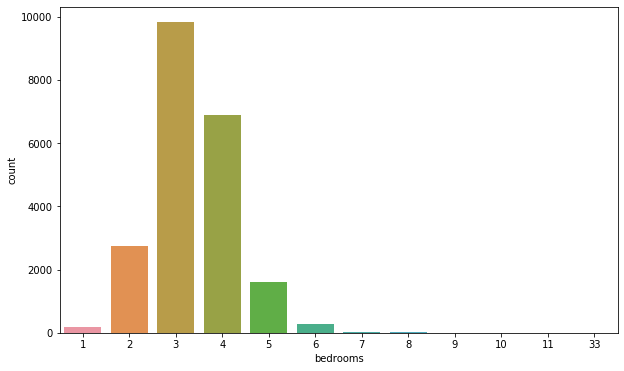

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['bedrooms'])
# From this we can say that the most of the houses has number of bedrooms between 2 to 5.
# Also there are some houses which have bedrooms more than 7 but they are negligible. 

In [ ]:
df.corr()['price'].sort_values()
# From this we can say that price os houses is mostly coreleted with the squt_living and many other features. 

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

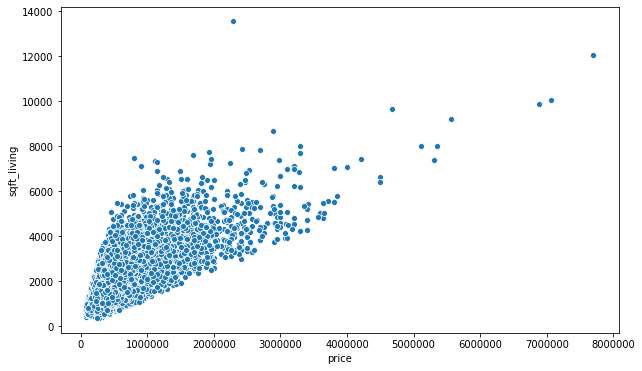

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['price'],y=df['sqft_living'],data=df)
# This will say that there is linearity between price and sqft_living.

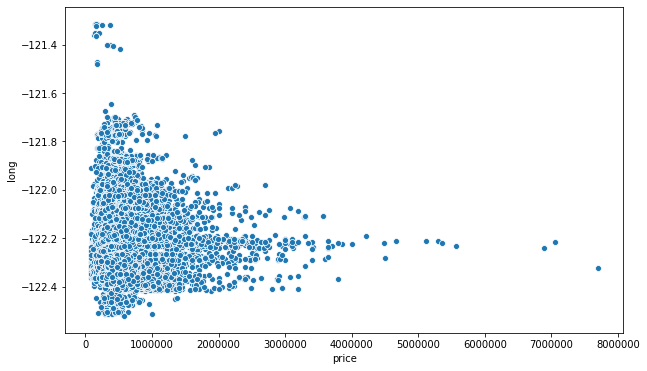

In [ ]:
# So in our data set we have coloum named lat and long which gives latitude and longitude.
# So if plot the graph against this we can say that at what lat and long the the price is maximum or minimum.
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['price'],y=df['long'],data=df)
# So this will show that at long -122.2 the prices of house are more.
# Similerly for latitude.

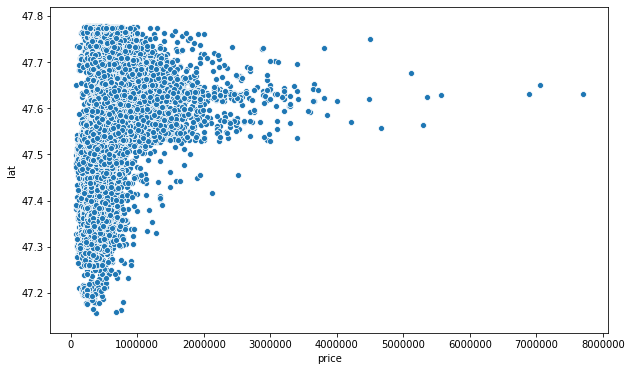

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['price'],y=df['lat'],data=df)
# This shows that at latitude 47.65 the prices are more.

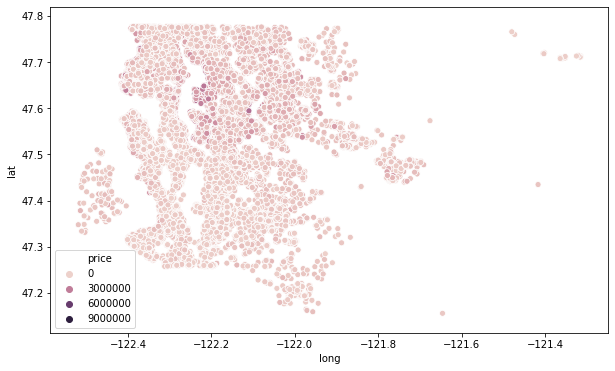

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['long'],y=df['lat'],data=df,hue=df['price'])
# So this scatter plot will approximatly shows us the map of king city.
# Now if we add hue to it as price this will give this.
# This is not clear sue to outliers present in data.

In [ ]:
df.sort_values('price',ascending=False)
# This shows that the maximum price is about 7.7 million and from our dist plot we have can say that the most  of  houses have price
# between 0 to 3,5 millions
# So we can remove outliers from data by removing 1 percent of data from this data set

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [ ]:
non_top_1_pec = df.sort_values('price',ascending=False)[216:]

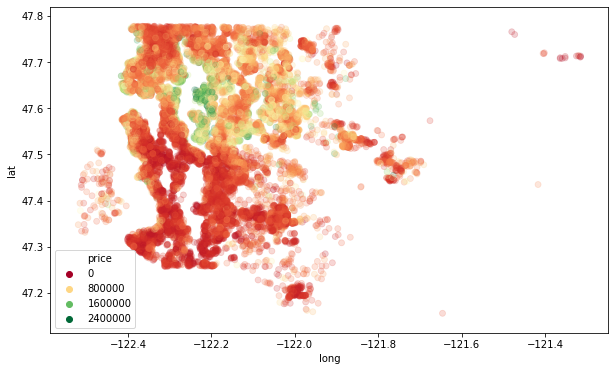

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['long'],y=df['lat'],data=non_top_1_pec ,hue='price', edgecolor=None,alpha=0.2, palette='RdYlGn')
# So this will clearly shows the price distribution based on lat and long.
# This is better version of representation of data.
# This shows that price is mostly high in area near in water.

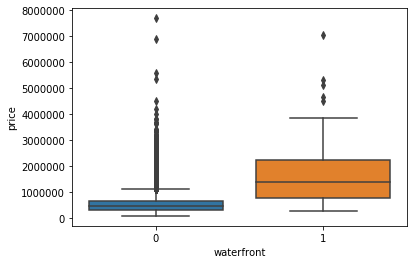

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

In [ ]:
# Now we will do some feature engineering.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df = df.drop('id',axis=1)

In [ ]:
# Now here the date column is string and hence we can convert it to date time format using pandas.
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['month'] = df['date'].apply(lambda date: date.month)
df['year'] = df['date'].apply(lambda date: date.year)
# Here we add to new columns year and month and dropo the date columns

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


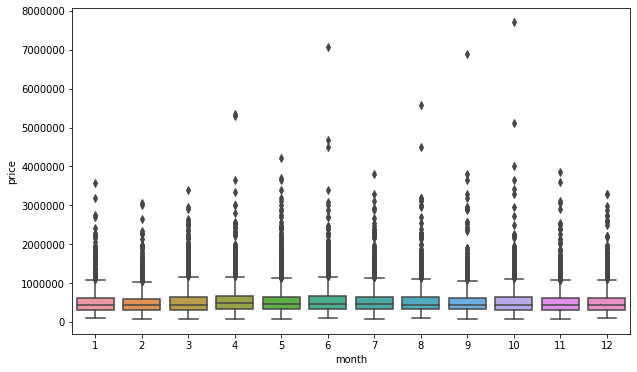

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

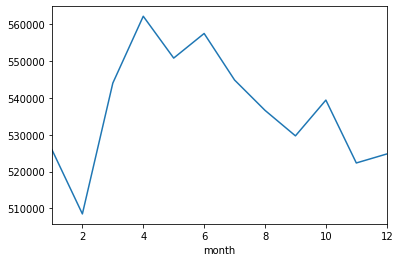

In [ ]:
df.groupby('month').mean()['price'].plot()
# From this we can say that the price of houses varies according to the month.

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

TensorFlow 2.x selected.


In [ ]:
X_train.shape

(15117, 19)

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 164us/sample - loss: 430229660048.4689 - val_loss: 418850538604.7210
Epoch 2/400
15117/15117 [==============================] - 0s 28us/sample - loss: 428155905046.4213 - val_loss: 411651437565.4716
Epoch 3/400
15117/15117 [==============================] - 0s 27us/sample - loss: 400229695342.7690 - val_loss: 349172884447.1309
Epoch 4/400
15117/15117 [==============================] - 0s 27us/sample - loss: 279119030897.2246 - val_loss: 176821833819.0222
Epoch 5/400
15117/15117 [==============================] - 0s 26us/sample - loss: 126142735147.2340 - val_loss: 96084703874.2123
Epoch 6/400
15117/15117 [==============================] - 0s 25us/sample - loss: 97784492800.1524 - val_loss: 93815355629.6691
Epoch 7/400
15117/15117 [==============================] - 0s 25us/sample - loss: 95853305295.1268 - val_loss: 91910670745.6000
Epoch 8/400
15117/15117 [====================

In [ ]:
losses = pd.DataFrame(model.history.history)

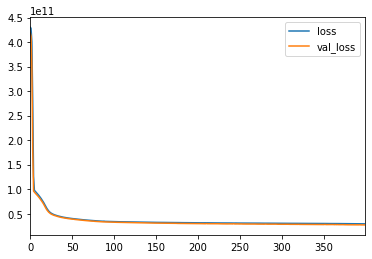

In [ ]:
losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

164636.36495020514

In [ ]:
mean_absolute_error(y_test,predictions)

101670.00936776621

In [ ]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
5.402966e+05

540296.6

In [ ]:
explained_variance_score(y_test,predictions)

0.795748249054582

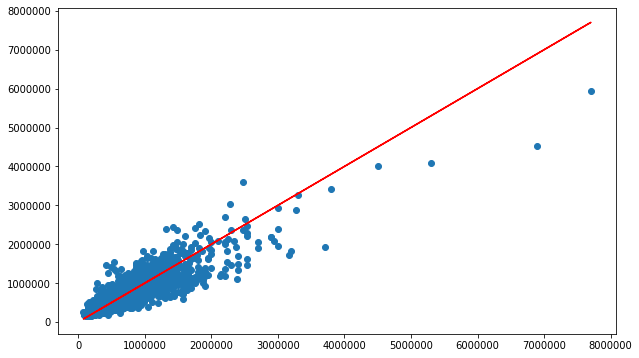

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
model.predict(single_house)

array([[278652.97]], dtype=float32)

In [ ]:
# This model is quite ok but it is little overshooting so we can remove this by removing the outliers i.e removing top one percent data.
# That is by using that non_top_1_perc dataframe.